In [1]:
import torch
from torch.autograd import Variable
from torch.autograd import Function
import numpy as np
from scipy import interpolate
import cv2
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
from grad_cam import *

In [3]:
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image

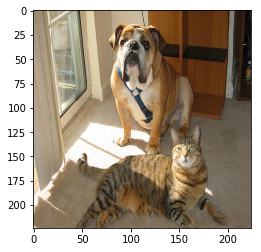

In [15]:
#path = "/home/ubuntu/prj/auto_dl/data/val/Abyssinian/Abyssinian_122.jpg"
#path = "/home/ubuntu/prj/auto_dl/data/images/Maine_Coon_2.jpg"
path = "/home/ubuntu/prj/sandbox/grad_cam/pytorch-grad-cam/examples/both.png"
img = Image.open(path).convert('RGB').resize((224, 224))
plt.imshow(img)

In [5]:
np.array(img).max()

255

In [6]:
model = models.resnet18(pretrained=True).cuda()
#model = models.vgg19(pretrained=True).cuda()
#model = models.resnet18(pretrained=False, num_classes=37)
#model = models.__dict__["resnet18"](num_classes = 37).cuda()
#model = torch.nn.DataParallel(model).cuda()
#checkpoint = torch.load("/home/ubuntu/prj/auto_dl/model_best.pth.tar")
#model.load_state_dict(checkpoint['state_dict'])
model.eval()
#model = model.module
gradcam = GradCam(model, ["layer3","layer4"])
#gradcam = GradCam(model, ["35"])


conv1
bn1
relu
maxpool
layer1
layer2
layer3
layer4
avgpool
fc


/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/torch/autograd/__init__.py:93: UserWarning: retain_variables option is deprecated and will be removed in 0.3. Use retain_graph instead.
  warnings.warn("retain_variables option is deprecated and will be removed in 0.3. "


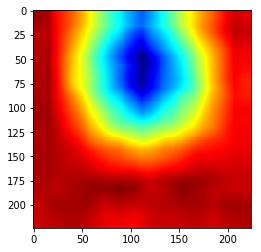

In [16]:
###############
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.ToTensor(),
    normalize])
input_img = torch.autograd.Variable(preprocess(img).unsqueeze(0)).cuda()
################
cam, heatmap = gradcam(input_img, relu=True)

heatmap_img = Image.fromarray(heatmap[0]).resize((224,224))
heatmap_img.save("heatmap.png")
plt.imshow(np.array(heatmap_img))



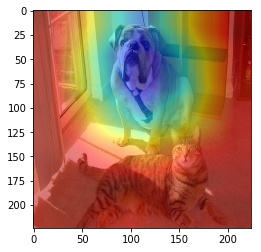

In [17]:
tmp = np.array(img).astype(float) + np.array(heatmap_img)
#tmp = tmp-tmp.min()
tmp = np.uint8((tmp / tmp.max())*255)
Image.fromarray(tmp).save("heatmap2.png")
plt.imshow(tmp)